In [54]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats

## Exploratory Data Analysis (EDA)

In [ ]:
> shape (rows, columns), types
> categorical value counts
> correlation
> missing value count
> Outliers

In [8]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             406 non-null    object 
 1   sex                   404 non-null    object 
 2   matric_gpa_%          399 non-null    float64
 3   study_year            333 non-null    object 
 4   faculty               399 non-null    object 
 5   gpa_%_2023            320 non-null    float64
 6   accommodation_status  383 non-null    object 
 7   monthly_allowance     375 non-null    object 
 8   scholarship           398 non-null    object 
 9   study_hours_week      403 non-null    object 
 10  socialising_week      404 non-null    object 
 11  drinks_night          404 non-null    object 
 12  classes_missed        403 non-null    object 
 13  modules_failed        403 non-null    object 
 14  in_relationship       403 non-null    object 
 15  parental_approval     4

In [11]:
survey_df["sex"].value_counts(normalize = True)

sex
Male      0.534653
Female    0.465347
Name: proportion, dtype: float64

In our survey, there are 53% of male and 47% of female population.

In [13]:
table = pd.crosstab(survey_df['parental_approval'], survey_df['relationship_parents'])
table

relationship_parents,Close,Distant,Fair,Very close
parental_approval,,,,
No,18,1,9,20
Yes,79,1,25,248


<< Write Description >>

<Axes: xlabel='relationship_parents'>

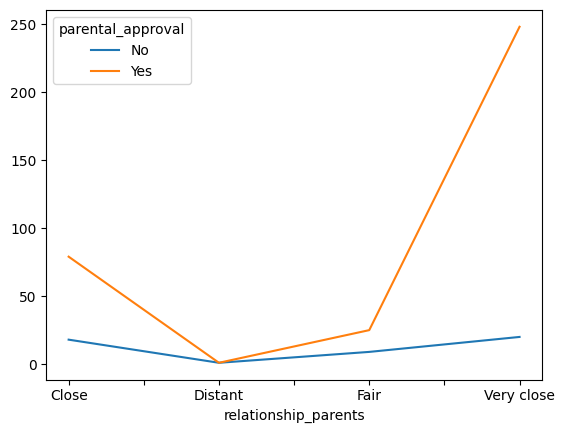

In [20]:
table.T.plot.line()

<Axes: xlabel='relationship_parents', ylabel='parental_approval'>

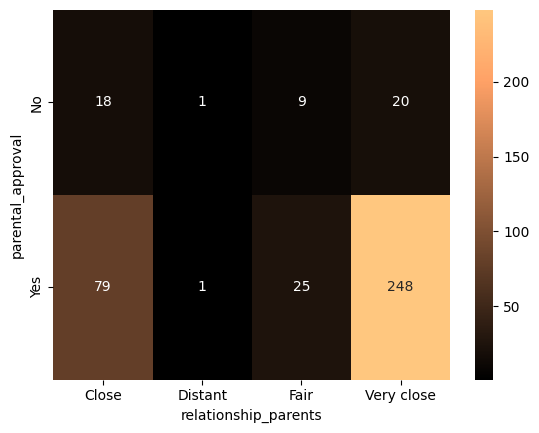

In [25]:
sns.heatmap(table, annot=True, fmt='.3g', cmap='copper')

In [26]:
survey_df.accommodation_status.value_counts()

accommodation_status
Private accommodation/ stay with family/friends    335
Non-private accommodation ie. Res                   48
Name: count, dtype: int64

In [27]:
survey_df.socialising_week.value_counts()

socialising_week
Only weekends    113
1                108
2                 87
3                 63
0                 17
4+                16
Name: count, dtype: int64

In [38]:
table = pd.crosstab(survey_df['accommodation_status'], survey_df['socialising_week'])
table

socialising_week,0,1,2,3,4+,Only weekends
accommodation_status,,,,,,
Non-private accommodation ie. Res,2,12,15,5,3,11
Private accommodation/ stay with family/friends,14,89,70,52,13,97


* During Weekends, private accommondation students do party 9th times more than hostelers
* In average private accommondation students do party more than 7th times  than hostelers


In [55]:
contingency_table = pd.crosstab(survey_df['accommodation_status'], survey_df['socialising_week'])
chi2_score, p_value, dof, expected = stats.chi2_contingency(contingency_table)

In [56]:
print(f"Chi-square test score = {chi2_score :.5f}")
print(f"p-value = {p_value :.5f}")

Chi-square test score = 3.90990
p-value = 0.56246


### Influence of Gender on GPA

In [40]:
grouped = survey_df[['sex','gpa_%_2023']].groupby("sex")

In [41]:
grouped.mean()

,gpa_%_2023
sex,
Female,67.596067
Male,65.097059


<Axes: xlabel='gpa_%_2023', ylabel='sex'>

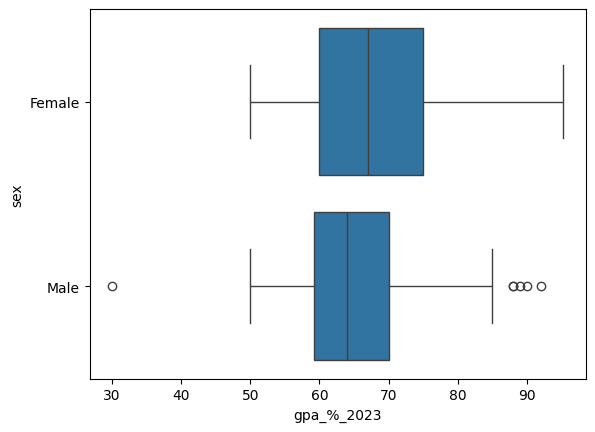

In [44]:
sns.boxplot(x='gpa_%_2023', y='sex', data= survey_df)

<< Write Descriptions >>

<Axes: xlabel='matric_gpa_%', ylabel='gpa_%_2023'>

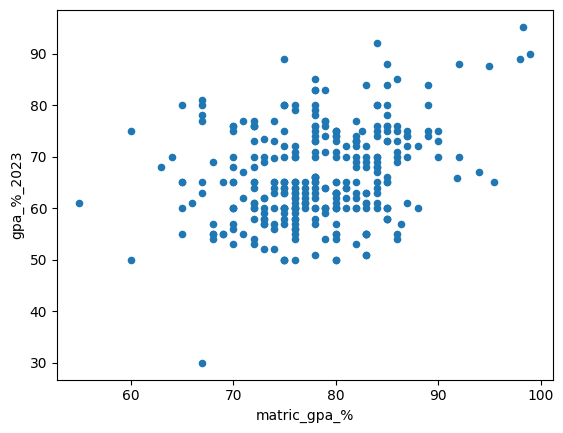

In [47]:
survey_df.plot.scatter(x="matric_gpa_%", y="gpa_%_2023")

In [48]:
survey_df[["matric_gpa_%","gpa_%_2023"]].corr()

,matric_gpa_%,gpa_%_2023
matric_gpa_%,1.000000,0.299104
gpa_%_2023,0.299104,1.000000


<< Write Description >>

In [53]:
survey_df.isna().sum()

timestamp                0
sex                      2
matric_gpa_%             7
study_year              73
faculty                  7
gpa_%_2023              86
accommodation_status    23
monthly_allowance       31
scholarship              8
study_hours_week         3
socialising_week         2
drinks_night             2
classes_missed           3
modules_failed           3
in_relationship          3
parental_approval        4
relationship_parents     3
dtype: int64

In [51]:
survey_df['study_year'].value_counts(dropna = False)

study_year
2nd Year        153
1st Year        128
NaN              73
3rd Year         40
4th Year          7
Postgraduate      5
Name: count, dtype: int64